# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

# Jessie NI


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [1]:
# Write your answer here

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [7]:
# Write your own code

currencies = pd.read_csv("data_raw/currencies.csv")
#currencies["date_string"] = pd.to_datetime(currencies["date_string"])
#currencies["date"] = currencies["date_string"].dt.strftime("%m %d, %Y")
#print(currencies)
currencies["date"] = pd.to_datetime(currencies["date_string"],format=("%B %m %d, %Y"))

currencies.dtypes

ValueError: time data 'Monday, Jan 04, 1999' does not match format '%B %m %d, %Y' (match)

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


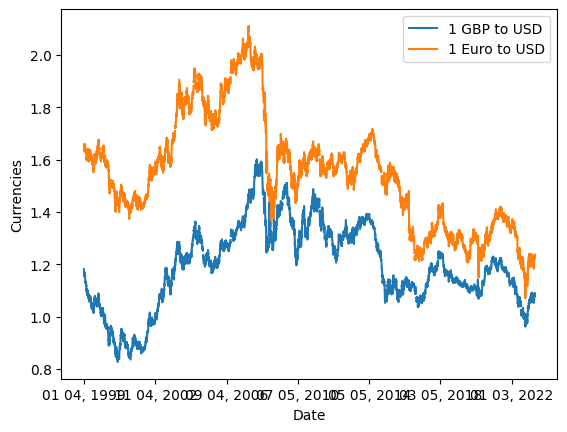

In [28]:
# Write your own code


currencies[["date","gbp_to_usd","eur_to_usd"]].set_index("date").plot()
plt.xlabel("Date")
plt.ylabel("Currencies")
plt.legend(["1 GBP to USD","1 Euro to USD"])


<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [46]:
# Write your own code

currencies["diff_gbp"] = currencies["gbp_to_usd"].diff()
currencies["lag_gbp"]    = currencies["gbp_to_usd"].shift(1)
currencies["growth_gbp"] = currencies["diff_gbp"]* 100/currencies["lag_gbp"]

currencies["diff_euro"] = currencies["eur_to_usd"].diff()
currencies["lag_euro"]    = currencies["eur_to_usd"].shift(1)
currencies["growth_euro"] = currencies["diff_eur"]* 100/currencies["lag_eur"]

# currencies["diff_date"]  = currencies["date"].shift(1)
print(currencies)

     date_string  eur_to_usd  gbp_to_usd         date  diff_gbp  lag_gbp  \
0     1999-01-04      1.6581      1.1812  01 04, 1999       NaN      NaN   
1     1999-01-05      1.6566      1.1760  01 05, 1999   -0.0052   1.1812   
2     1999-01-06      1.6547      1.1636  01 06, 1999   -0.0124   1.1760   
3     1999-01-07      1.6495      1.1672  01 07, 1999    0.0036   1.1636   
4     1999-01-08      1.6405      1.1554  01 08, 1999   -0.0118   1.1672   
...          ...         ...         ...          ...       ...      ...   
6320  2023-03-27      1.2278      1.0789  03 27, 2023    0.0027   1.0762   
6321  2023-03-28      1.2341      1.0844  03 28, 2023    0.0055   1.0789   
6322  2023-03-29      1.2313      1.0826  03 29, 2023   -0.0018   1.0844   
6323  2023-03-30      1.2368      1.0899  03 30, 2023    0.0073   1.0826   
6324  2023-03-31      1.2369      1.0872  03 31, 2023   -0.0027   1.0899   

      growth_gbp  diff_eur  lag_eur  growth_eur    diff_date  diff_euro  \
0           

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



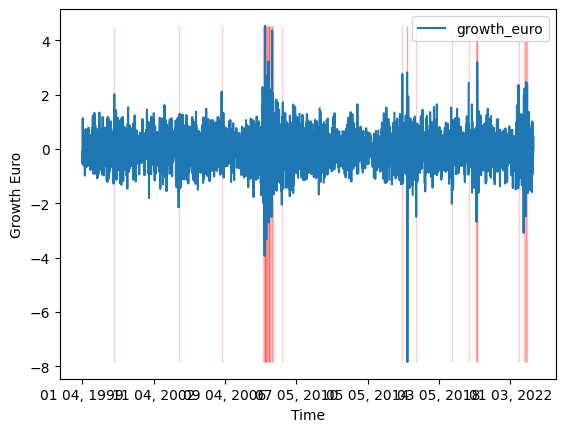

In [59]:
# Write your own code

currencies["bool_cond"] = (currencies["growth_euro"]>2) | (currencies["growth_euro"]<-2)
# i just wrote bool_cond its not in the dataset

currencies[["date","growth_euro"]].set_index("date").plot()
plt.xlabel("Date")
plt.ylabel("Growth Euro")

vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond"],
                 alpha = 0.2,color = "red")


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [62]:
# Write your own code

month_config = pd.Grouper(key = "date",freq = "m")

month_data = currencies.groupby(month_config).agg(std_monthly = ("euro_to_usd","std"))

#plt.plot("date","std_monthly",
#         data = month_data.sort_values("date",ascending = True))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [63]:
currencies.dtypes

date_string    datetime64[ns]
eur_to_usd            float64
gbp_to_usd            float64
date                   object
diff_gbp              float64
lag_gbp               float64
growth_gbp            float64
diff_eur              float64
lag_eur               float64
growth_eur            float64
diff_date              object
diff_euro             float64
lag_euro              float64
growth_euro           float64
bool_cond                bool
dtype: object

<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [43]:
# Write your own code

currencies_long=pd.melt(currencies,
                     var_name="type",
                     value_name = "exchange_rate",
                     id_vars="date",
                     value_vars=['eur_to_usd','gbp_to_usd'])
display(currencies_long)


,date,type,exchange_rate
0,"01 04, 1999",eur_to_usd,1.6581
1,"01 05, 1999",eur_to_usd,1.6566
2,"01 06, 1999",eur_to_usd,1.6547
3,"01 07, 1999",eur_to_usd,1.6495
4,"01 08, 1999",eur_to_usd,1.6405
...,...,...,...
12645,"03 27, 2023",gbp_to_usd,1.0789
12646,"03 28, 2023",gbp_to_usd,1.0844
12647,"03 29, 2023",gbp_to_usd,1.0826
12648,"03 30, 2023",gbp_to_usd,1.0899
